In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("/home/pavankumar/data_sci_dec/datasets/heartdisease_data.csv",names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
df.replace('?',np.nan,inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


### Summert Statistic

In [4]:
df.describe()

,age,sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


##### above columns have closenes to mean and 50 percetile means less skewness present and 75 percentile and max does not have large difference means there is not much outliers are present

In [5]:
df.describe().columns

Index(['age', 'sex', 'cp', 'restecg', 'num'], dtype='object')

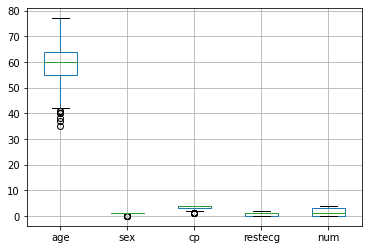

In [6]:
df.boxplot()

In [7]:
df.shape

(200, 14)

In [8]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [9]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [10]:

for i in df.select_dtypes('object').columns:
    print("Column name is ",i)
    print('Number of Null values are ==>',df[i].isnull().sum())
    print(df[i].value_counts(),'\n')
    print(f'\n Total Number of Categoricals in {i} ==> {len(df[i].value_counts())}\n')
    print("==============================")

Column name is  trestbps
Number of Null values are ==> 56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
144     4
134     4
170     4
124     4
128     4
126     4
136     4
158     3
132     3
180     2
116     2
112     2
125     2
152     2
104     2
155     2
154     2
138     2
106     1
156     1
0       1
146     1
102     1
135     1
100     1
127     1
190     1
178     1
172     1
96      1
114     1
118     1
Name: trestbps, dtype: int64 


 Total Number of Categoricals in trestbps ==> 40

Column name is  chol
Number of Null values are ==> 7
0      49
258     4
220     4
203     4
214     3
       ..
283     1
181     1
177     1
232     1
230     1
Name: chol, Length: 99, dtype: int64 


 Total Number of Categoricals in chol ==> 99

Column name is  fbs
Number of Null values are ==> 7
0    125
1     68
Name: fbs, dtype: int64 


 Total Number of Categoricals in fbs ==> 2

Column name is  thalach
Number of Null values are ==> 53
120    12
140

In [11]:
df['oldpeak'].mode()

0    0
dtype: object

In [12]:
# from sklearn.impute import KNNImputer
# knni=KNNImputer()
# df1=knni.fit_transform(df.drop(['age','sex','cp','restecg','num'],axis=1))
# df1=pd.DataFrame(df1,columns=['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal'])

# for i in df1.columns:
#     print("Column name is ",i)
#     print(df1[i].value_counts(),'\n')
#     print(f'\n Total Number of Categoricals in {i} ==> {len(df1[i].value_counts())}\n')
#     print("==============================")

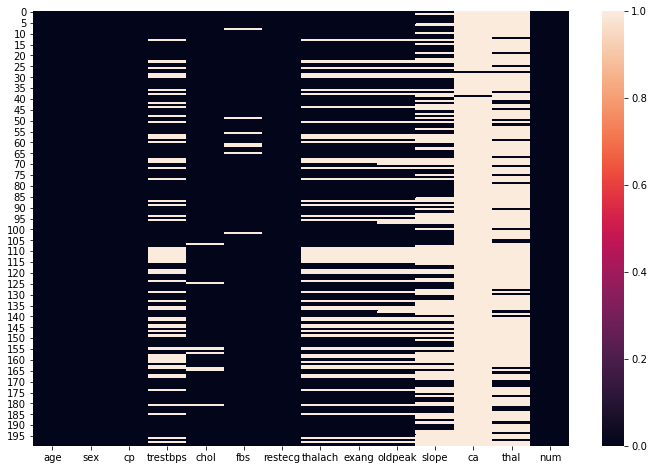

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),xticklabels=True)

#### Heatmap shows that some number of columns having heigh null values and some of there are less

In [14]:
df.shape

(200, 14)

In [15]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

#### droping the columns which having 75% of rows null [thal, ca]

In [16]:
df.drop(['thal','ca'],axis=True,inplace=True)

In [17]:
df.select_dtypes(include='object').columns

Index(['trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope'], dtype='object')

In [18]:
df['trestbps']=pd.to_numeric(df['trestbps'])

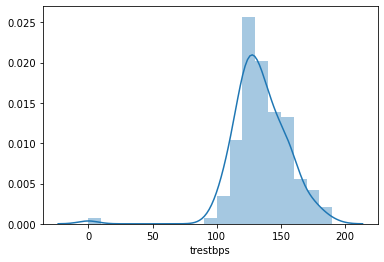

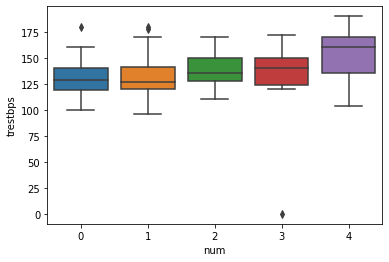

In [19]:
sns.distplot(df['trestbps'])
plt.show()
sns.boxplot(x=df['num'],y=df['trestbps'])

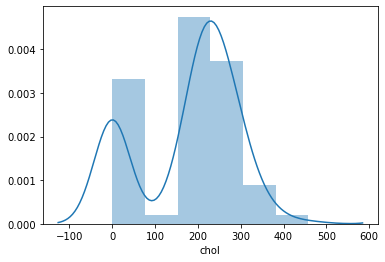

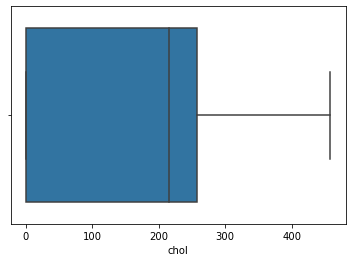

In [20]:
df['chol']=pd.to_numeric(df['chol'])
sns.distplot(df['chol'])
plt.show()
sns.boxplot(df['chol'])

##### chol column is in continues nature Filling Null values with their mean

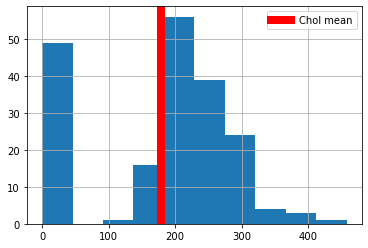

In [21]:
chol=df['chol'].hist()
mean_chol=df['chol'].mean()
plt.axvline(mean_chol,linewidth=8,color='red',label='Chol mean')
plt.legend()
plt.show()

In [22]:
df['chol'].isnull().sum()

7

In [23]:
df['chol'].fillna(df['chol'].mean(),inplace=True)

In [24]:
df['chol'].isnull().sum()

0

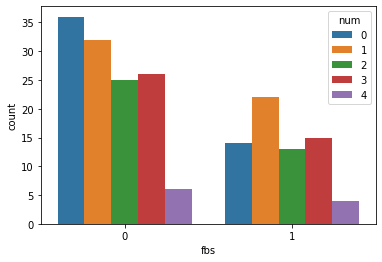

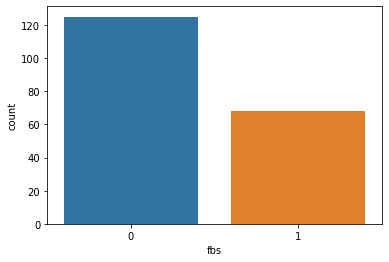

In [25]:
# df['fbs']=pd.to_numeric(df['fbs'])
sns.countplot(df['fbs'],hue=df['num'])
plt.show()
sns.countplot(df['fbs'])
plt.show()

In [29]:
df['fbs'].isnull().sum()

7

In [31]:
df['fbs']=pd.to_numeric(df['fbs'])
df['fbs']

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
195    1.0
196    0.0
197    1.0
198    1.0
199    0.0
Name: fbs, Length: 200, dtype: float64

In [45]:
df['fbs'].isnull().sum()

0

In [48]:
for i in df.select_dtypes(include='object').columns:
    df[i]=pd.to_numeric(df[i])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  144 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   restecg   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  num       200 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 18.9 KB


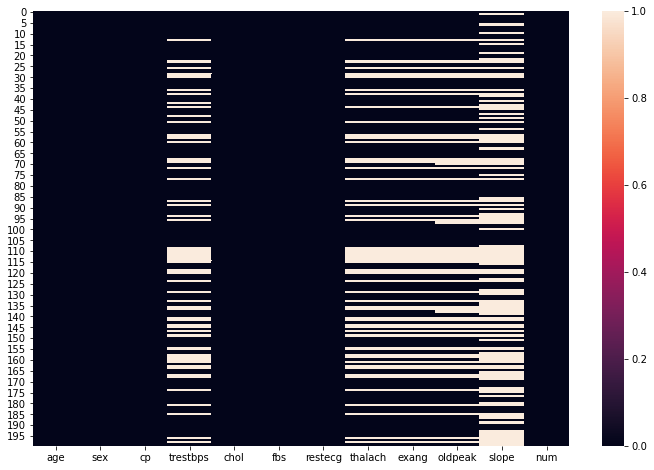

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),xticklabels=True)

In [53]:
df['thalach']=pd.to_numeric(df['thalach'])

In [54]:
df['exang']=pd.to_numeric(df['exang'])

In [55]:
df['oldpeak']=pd.to_numeric(df['oldpeak'])

In [56]:
df['trestbps']=pd.to_numeric(df['trestbps'])

In [57]:
df['slope']=pd.to_numeric(df['slope'])

In [58]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
age,1.000000,0.034230,-0.038280,0.210980,0.066972,0.135728,0.002400,-0.174125,0.156823,0.183086,0.148603,0.287289
sex,0.034230,1.000000,0.038036,0.013820,-0.096150,-0.059400,0.060621,-0.001747,0.018155,0.106811,0.124613,0.147470
cp,-0.038280,0.038036,1.000000,0.097246,0.065818,-0.044416,0.034790,-0.160306,0.235935,0.055933,0.047762,0.168210
trestbps,0.210980,0.013820,0.097246,1.000000,0.174536,0.230291,0.106918,-0.013177,0.222550,0.118022,0.109788,0.172577
chol,0.066972,-0.096150,0.065818,0.174536,1.000000,0.173396,0.024257,-0.047129,0.099844,0.002477,0.077886,0.076444
fbs,0.135728,-0.059400,-0.044416,0.230291,0.173396,1.000000,0.170616,0.044988,-0.255473,-0.126903,0.009712,0.048940
restecg,0.002400,0.060621,0.034790,0.106918,0.024257,0.170616,1.000000,0.014274,-0.093141,-0.123890,-0.027817,-0.032800
thalach,-0.174125,-0.001747,-0.160306,-0.013177,-0.047129,0.044988,0.014274,1.000000,-0.075057,0.179167,-0.164124,-0.094392
exang,0.156823,0.018155,0.235935,0.222550,0.099844,-0.255473,-0.093141,-0.075057,1.000000,0.314143,0.149392,0.304296
oldpeak,0.183086,0.106811,0.055933,0.118022,0.002477,-0.126903,-0.123890,0.179167,0.314143,1.000000,0.331319,0.457514


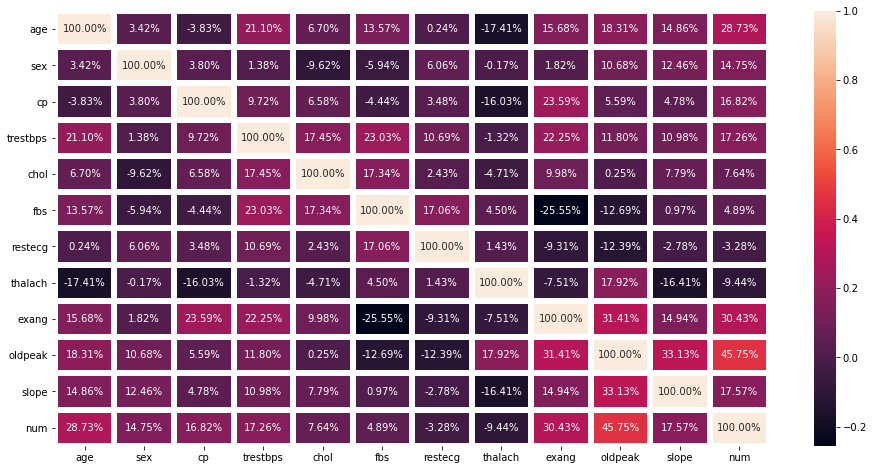

In [62]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.2%',linewidths=5)

In [64]:
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

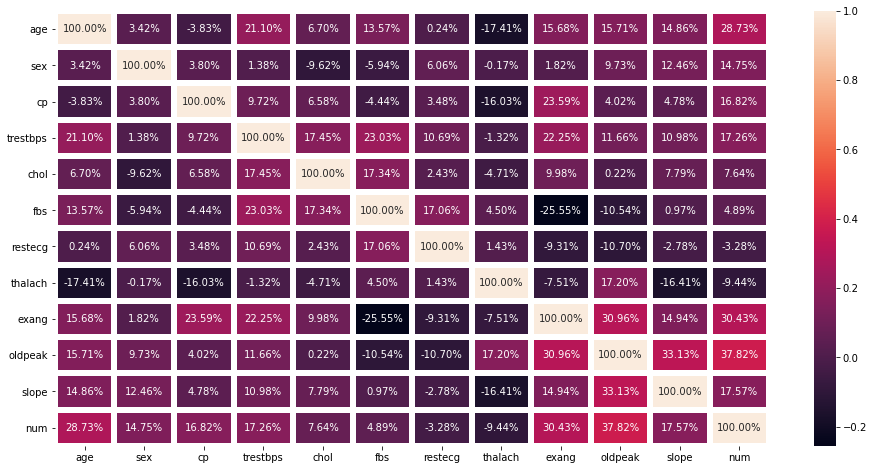

In [65]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.2%',linewidths=5)

In [70]:
df['exang'].mode()

0    1.0
dtype: float64

In [71]:
df['exang']=df['exang'].replace(np.nan,1.0)

In [72]:
df['exang'].isnull().sum()

0

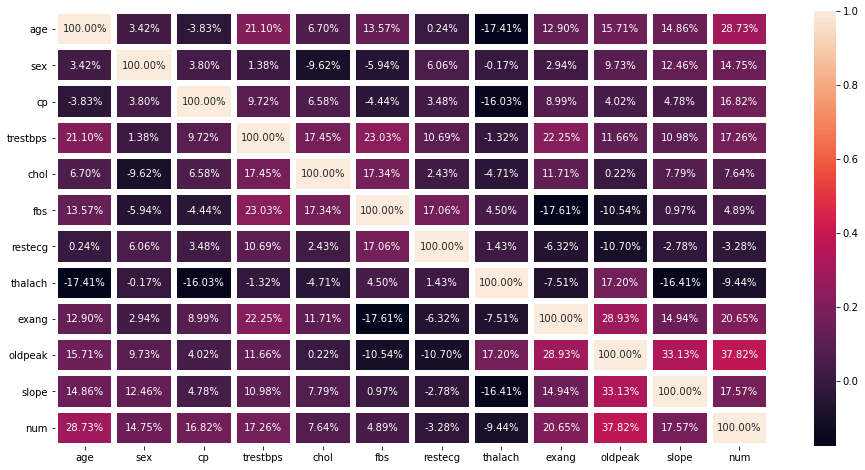

In [73]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.2%',linewidths=5)

In [76]:
df['thalach'].mode()

0    120.0
1    140.0
dtype: float64

In [77]:
(120+140)/2

130.0

In [79]:
df['thalach']=df['thalach'].replace(np.nan,130.0)

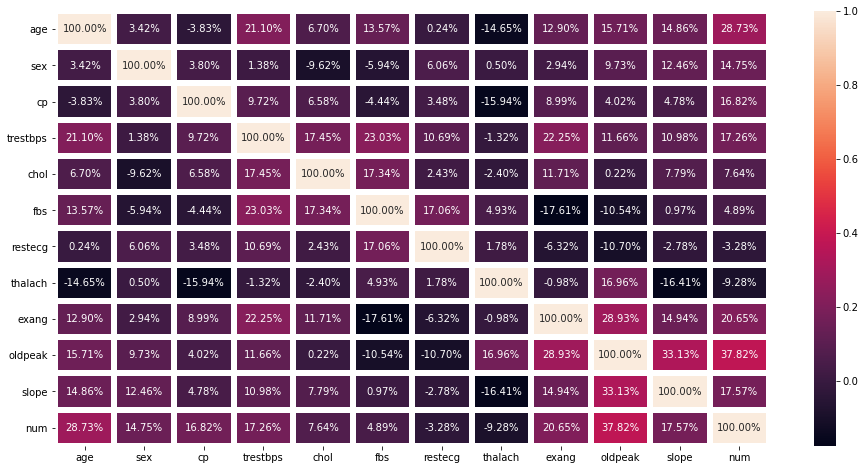

In [80]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.2%',linewidths=5)

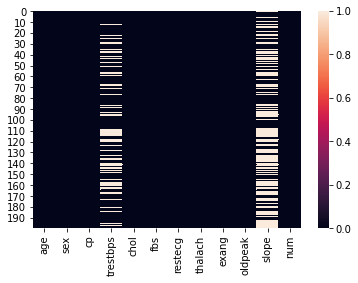

In [82]:
sns.heatmap(df.isnull())

In [86]:
df['trestbps'].mean()

133.76388888888889

In [89]:
from sklearn.impute import KNNImputer
knni=KNNImputer()
for i in ['trestbps','slope']:
    df[i]=knni.fit_transform(pd.DataFrame(df[i]))

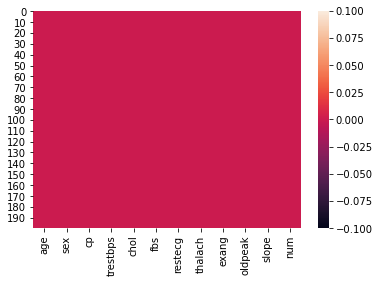

In [90]:
sns.heatmap(df.isnull())

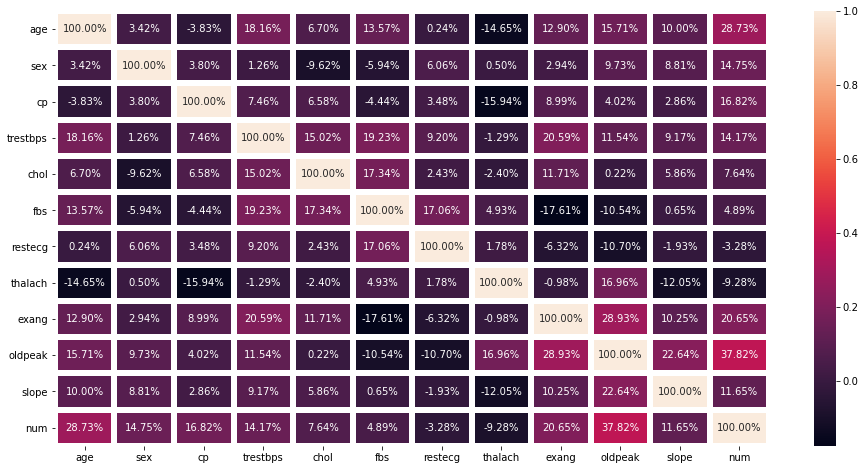

In [91]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='.2%',linewidths=5)

###  heatmap shows that fbs and restcg having less correlation with our target column "num"

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

In [105]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'num'],
      dtype='object')

In [113]:
# for best random state after standard scaller
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['num'],axis=1), 
                                                    df['num'], test_size=0.30, 
                                                    random_state=i)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    predictions = logmodel.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    if accuracy>accu:
        accu=accuracy
        best_state=i
print(f"Final accuracy is{accu} and best random state is {best_state}")

Final accuracy is0.45 and best random state is 218


In [114]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['num'],axis=1), 
                                                    df['num'], test_size=0.30, 
                                                    random_state=218)

In [111]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test,predictions)

0.43333333333333335

## Pipeline

In [96]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('num',axis=1), 
                                                    df['num'], test_size=0.30, 
                                                    random_state=218)

In [97]:
parameters_deci_c={
 'criterion': ['gini','entropy'],
 'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [233]}

parameters_knn_c={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
#     'algorithm':['auto','ball_tree','kd_tree','brute']
    
}
parameters_svc={
    'kernel': ['linear','poly','rbf','sigmoid'],
    'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    
}
parameters_log_reg = {'penalty':['l1', 'l2', 'elasticnet'],
                      'solver':['newton-cg','lbfgs','liblinear','sag','saga']
                     }

In [99]:
parameter_lis=[parameters_log_reg,parameters_knn_c,parameters_svc,parameters_deci_c]
models=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier()]
models_name=['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier']
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,6),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='accuracy'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    accuracy=accuracy_score(y_test,pred)
    print('Accuracy  Score is : ',accuracy_score(y_test,pred)*100,'%')
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Best Parameters are : ',gsv[0].best_params_)
    print(f'Cross Validation Score is : {crv}\nModel name is {gsv}\n==============================================================================')
    if accuracy>best_score:
        best_score=accuracy
        best_model_name=[]
        best_model_name.append(gsv[0])
        
print(f"Best model name is :  {best_model_name[0]}")
    

Accuracy  Score is :  40.0 %
[[6 4 2 4 0]
 [3 8 2 3 0]
 [1 2 4 3 0]
 [4 1 5 6 0]
 [0 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.43      0.38      0.40        16
           1       0.50      0.50      0.50        16
           2       0.29      0.40      0.33        10
           3       0.38      0.38      0.38        16
           4       0.00      0.00      0.00         2

    accuracy                           0.40        60
   macro avg       0.32      0.33      0.32        60
weighted avg       0.40      0.40      0.40        60

Best Parameters are :  {'penalty': 'l2', 'solver': 'newton-cg'}
Cross Validation Score is : 0.34285714285714286
Model name is Pipeline(steps=[('LogisticRegression',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                                          'solver': ['newton-cg', 'lbfgs',
                           

In [100]:
######  'criterion': ['gini','entropy'], default=”mse”
def rndtree(a,b):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestClassifier(n_estimators=i,random_state=b)
        mod.fit(X_train,y_train)
        pred = mod.predict(X_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestClassifier(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    print('Accuracy  Score is : ',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print((cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5).mean()*100))
    print("best n is ", best_n)

In [101]:
rndtree(list(np.arange(120,170)),214)

Accuracy  Score is :  0.38333333333333336
[[7 4 2 3 0]
 [3 7 3 3 0]
 [1 3 5 1 0]
 [4 4 4 4 0]
 [0 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.37      0.44      0.40        16
           2       0.33      0.50      0.40        10
           3       0.36      0.25      0.30        16
           4       0.00      0.00      0.00         2

    accuracy                           0.38        60
   macro avg       0.31      0.33      0.31        60
weighted avg       0.38      0.38      0.37        60

37.14285714285714
best n is  120


In [102]:
def rftree(a,b,c):
    mod=RandomForestClassifier(n_estimators=i,random_state=b,criterion=c)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print('Accuracy  Score is : ',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print((cross_val_score(RandomForestClassifier(n_estimators=i,random_state=b,criterion=c),X_train,y_train,cv=5).mean()*100))

In [103]:
rftree(120,218,'gini')

Accuracy  Score is :  0.36666666666666664
[[7 3 3 3 0]
 [2 7 5 2 0]
 [1 4 3 1 1]
 [5 4 2 5 0]
 [0 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.37      0.44      0.40        16
           2       0.21      0.30      0.25        10
           3       0.45      0.31      0.37        16
           4       0.00      0.00      0.00         2

    accuracy                           0.37        60
   macro avg       0.30      0.30      0.29        60
weighted avg       0.38      0.37      0.37        60

35.0


In [104]:
rftree(120,218,'entropy')

Accuracy  Score is :  0.36666666666666664
[[7 3 3 3 0]
 [2 8 4 2 0]
 [2 3 3 1 1]
 [5 4 2 4 1]
 [0 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        16
           1       0.42      0.50      0.46        16
           2       0.23      0.30      0.26        10
           3       0.40      0.25      0.31        16
           4       0.00      0.00      0.00         2

    accuracy                           0.37        60
   macro avg       0.30      0.30      0.29        60
weighted avg       0.37      0.37      0.36        60

35.0


In [115]:
mod=LogisticRegression(penalty='l2')
mod.fit(X_train,y_train)

LogisticRegression()

# Conclusion  Best model is Logistic Regression  from above all models

In [ ]:
import pickle
file_name='heart_disease_model.pkl'
pickle.dump(mod,open(file_name,'wb'))